# Correlación de nulidad 

En la clase anterior logramos graficar 2 variables que tenían valores faltantes.

En la vida real nos vamos a encontrar con variables que tienen valores faltantes, y necesitaremos una forma de visualizar si existe una relación entre estas 2 variables o no, aquí es donde entra la correlación de nulidad. 

Que responde a la pregunta: **¿existen valores faltantes que aparecen conjuntamente con otra variables en el conjunto de datos?**

Vamos a aplicarlo...

#### Importando librerías

In [1]:
### Importando librerías
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

#### Configurar el aspecto general de las gráficas del proyecto

In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

#### Leer conjunto de datos

In [3]:
#Cargar conjunto de datos
riskfactors = pyreadr.read_r('dataset/riskfactors.rda')

#Convertirlo a Data Frame
riskfactors_df = next(iter(riskfactors.values()))

#Borrar el diccionario
del riskfactors

In [4]:
#Verificar tipo 
#type(riskfactors_df)

#LLamar al data frame
riskfactors_df.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


### Correlación de nulidad

/home/dens/miniforge3/envs/deteccion/lib/python3.9/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/home/dens/miniforge3/envs/deteccion/lib/python3.9/site-packages/seaborn/matrix.py:316: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


<AxesSubplot:>

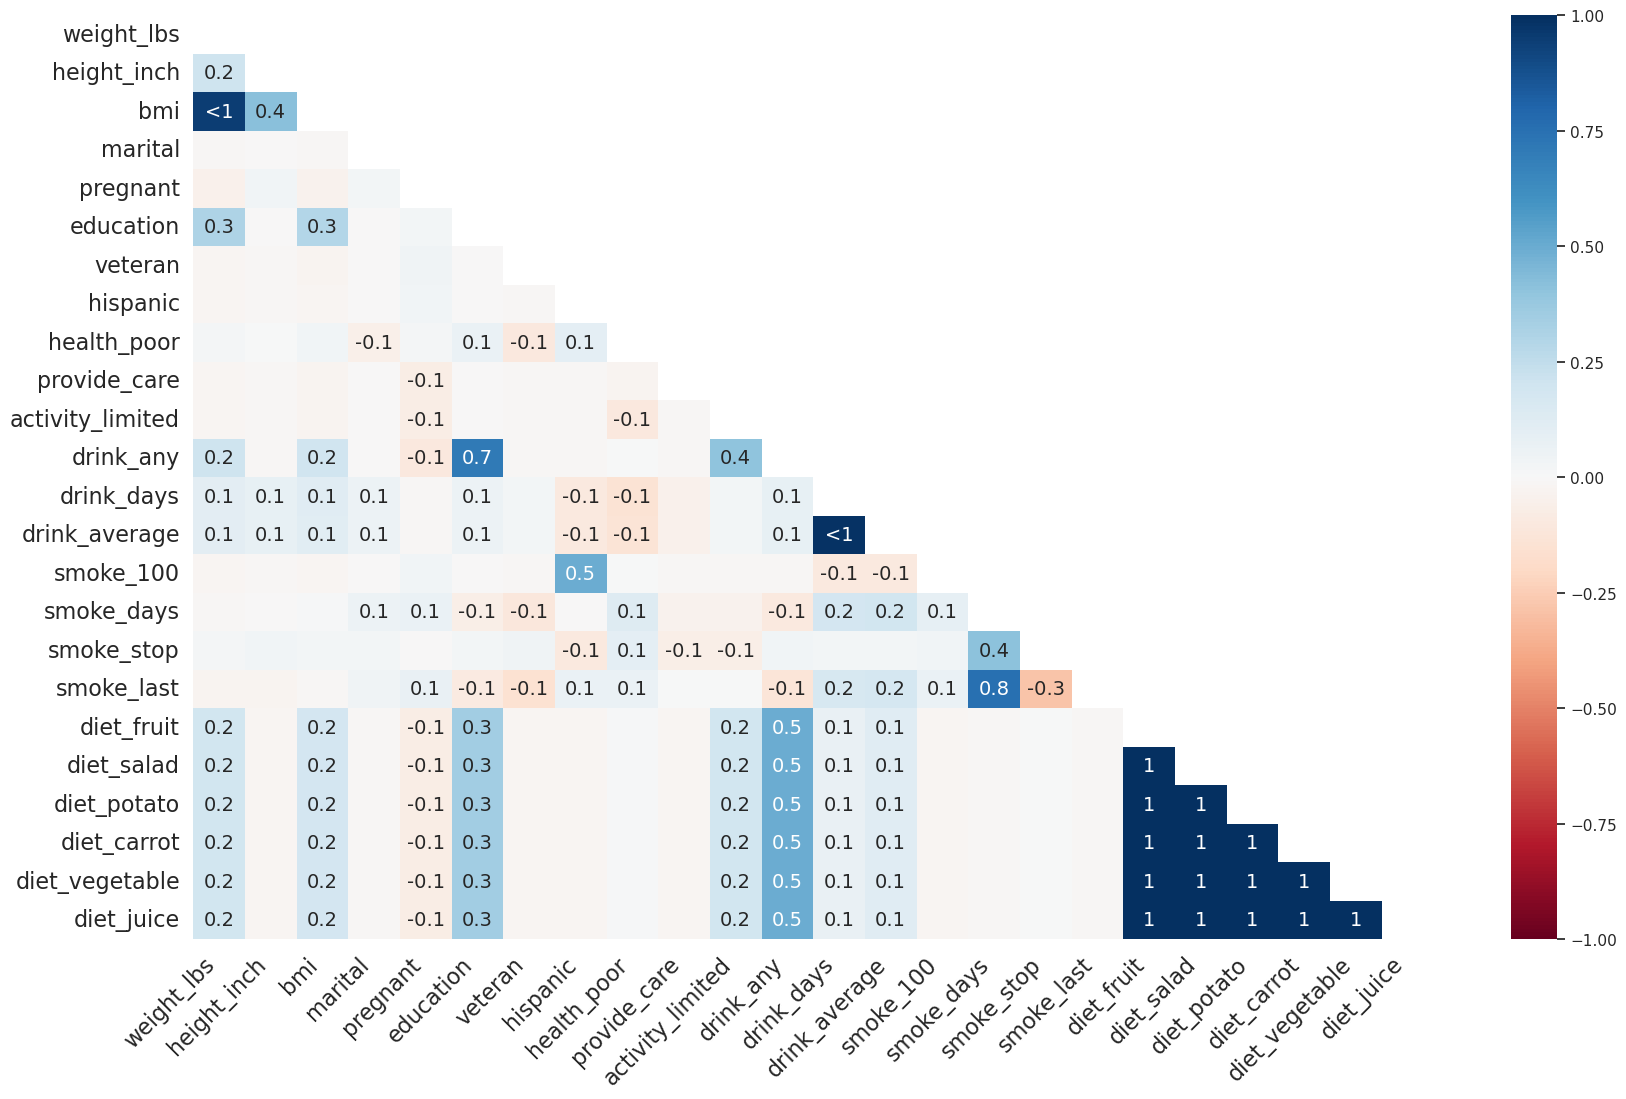

In [5]:
missingno.heatmap(
    df=riskfactors_df,
)

Cómo se puede observar tenemos una matriz con colores y en la parte superior esta en blanco debido a que es una matriz simétrica, entonces posee los mismos valores que la diagonal inferior.

Vamos a abordar lo importante:

### Correlación positiva
Colores azules son aquellos que tienen una correlación positiva y nos indicarán que existe una relación en la presencia de los valores faltantes con una columna con la relación de la presencia de los valores faltantes de otra columna.

Por ejemplo:
En la sección de dieta tienen un valor de 1, entonces diríamos que:

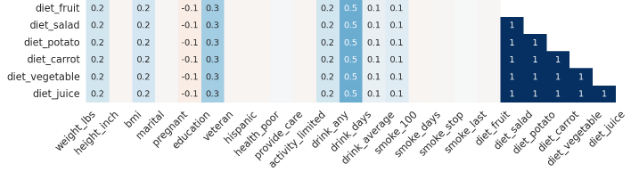

> *Cada vez que nos falta un valor en **diet_fruit** nos falta un valor en **diet_salad** y así sucesivamente para los otros tipos de dieta*.

### Correlación negativa

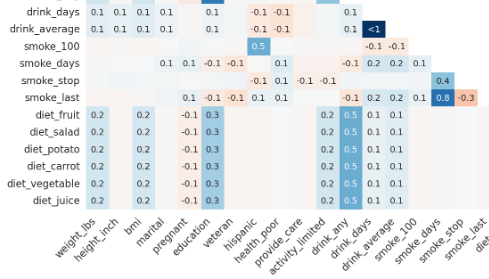

Después vamos a tener valores en color rojo, lo que indica una correlación negativa, y lo que nos dirá es que:
> *Para una variable cuando tengamos un valor para la otra no vamos a tener el valor o viceversa; para una variable cuando no tengamos un valor vamos a tener un valor para otra variable.*

Como es el caso de `smoke_last` con `smoke_stop` que tienen una correlación negativa de **-0.3**. Lo que nos estaría diciendo es que cuando tenemos una no tenemos la otra.




### Correlación nula
¿Qué pasa cuando el valor está cercano a cero?

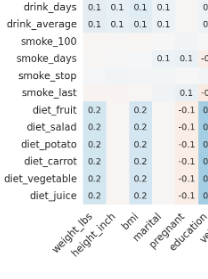

Esto nos va a indicar que no existe un correlación entre la presencia de nuestros valores faltantes de ambas columnas. 

### Correlación <1

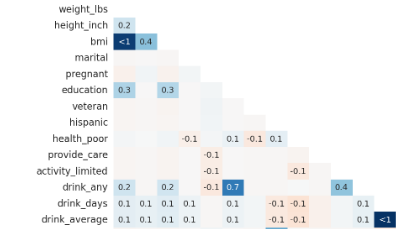

Aquí hay algo importante para mencionar, en algunos casos vamos a encontrar el `<1` con tono azul o `>-1` con tono rojo. Y esto nos va a indicar que estamos cerca de:     
- 100% de correlación en azul
- -100% de correlación en rojo

Así con este método ya tenemos un `insight` rápido de la correlación de nuestros valores faltantes y cómo se correlacionan con las otras variables. 

Pero no es la única función

## Dendrogram

<AxesSubplot:>

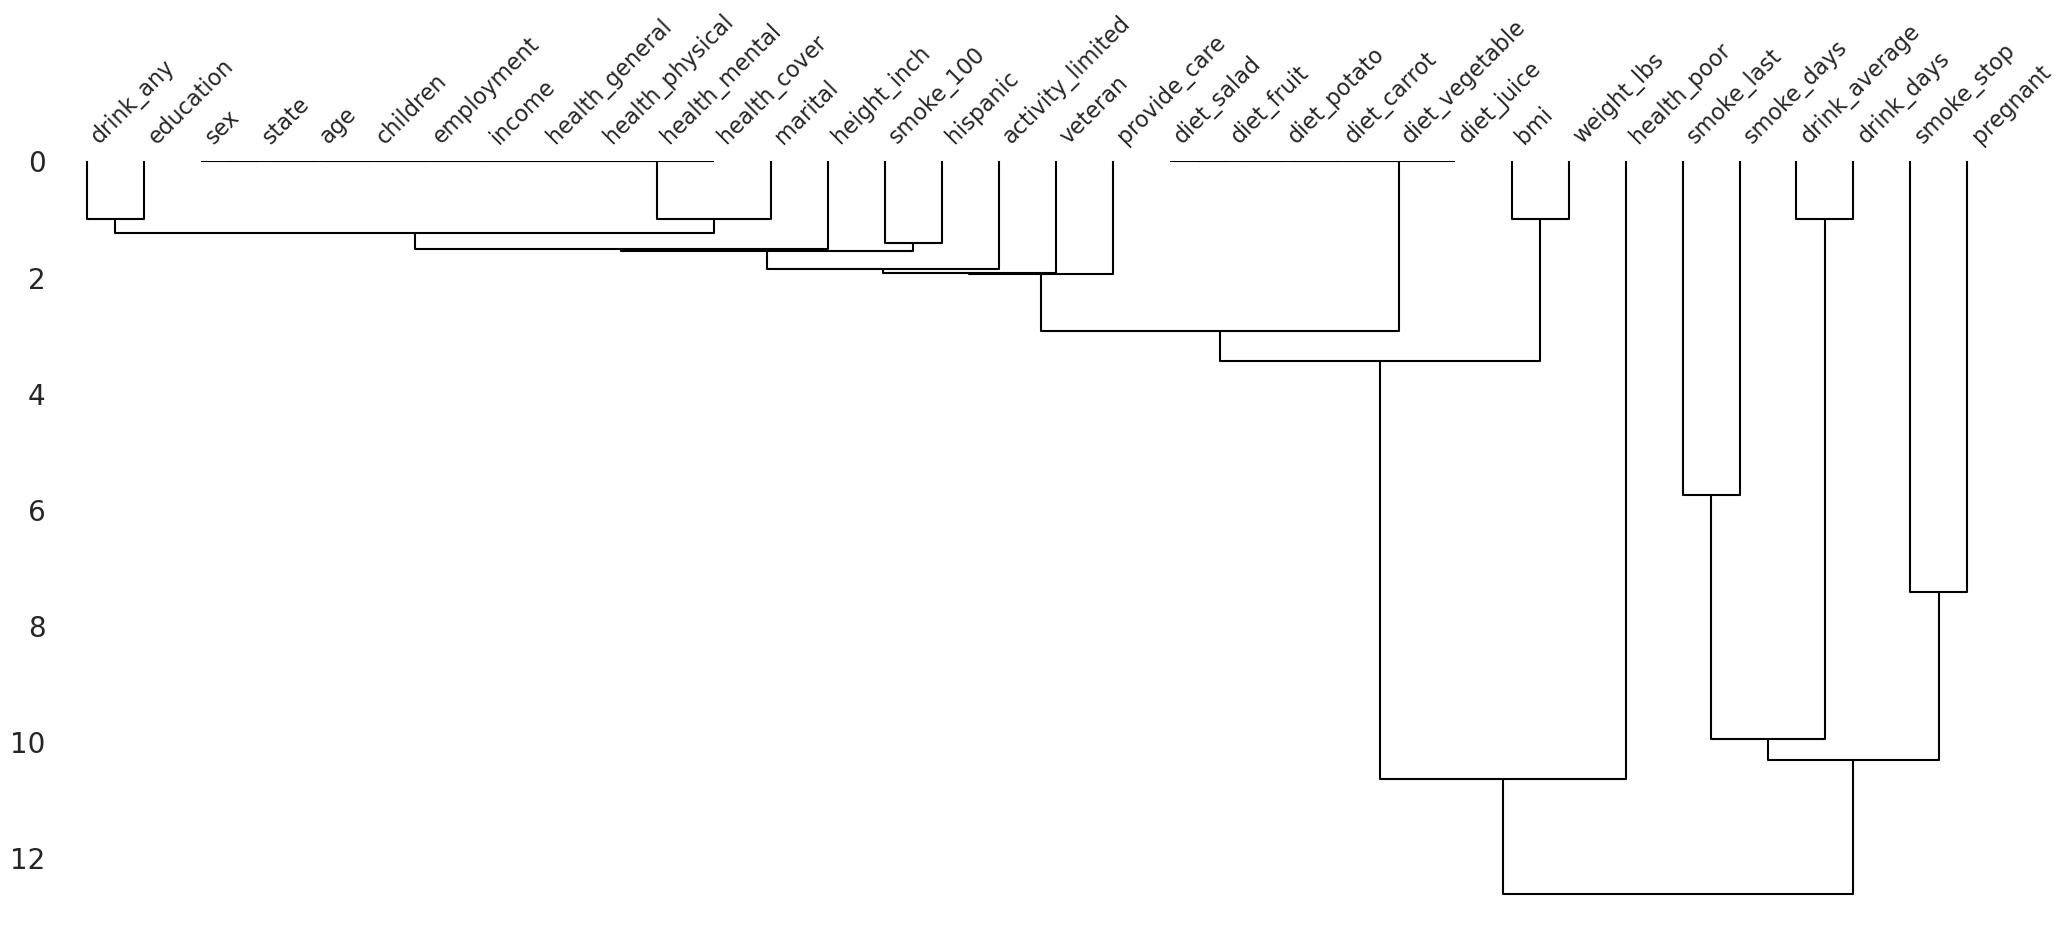

In [6]:
missingno.dendrogram(
    df=riskfactors_df
)

Tenemos una estructura parecida a un árbol. Este árbol es generado a traves de un clustering jerárquico y lo que hace es agrupar los grupos o las columnas que tienen correlaciones muy altas.

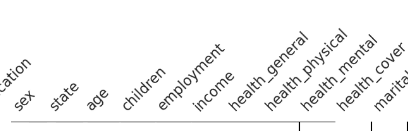

Si un número de columnas están agrupadas muy cerca del nivel base, quiere decir que la presencia de valores faltantes está muy relacionada entre estas columnas.

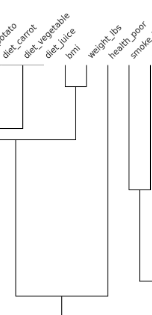

Entre mas separados estén las columnas en este árbol, es menos probable que los valores faltantes estén correlacionados entre las columnas.

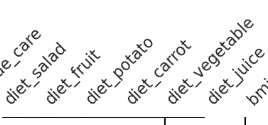

Como podemos observar en esta zona donde esta el parámetro `diet` hay una correlación muy fuerte entre estas variables, recordemos el triangulo azul que vimos en la gráfica anterior.

## Extra:

Un dendrograma es una representación gráfica de un árbol de jerarquía que muestra cómo diferentes elementos se agrupan en función de sus similitudes. En el contexto de correlación entre variables con valores nulos o faltantes, un dendrograma puede ser utilizado para visualizar patrones de agrupación entre las variables en términos de la similitud en los patrones de valores faltantes.

Aquí hay una breve descripción de cómo interpretar un dendrograma en este contexto:

1. **Similitud entre Variables:**

   - Las hojas del dendrograma representan las variables.
   - La longitud de las ramas que se unen en un nodo indica la similitud entre las variables. Ramas más largas indican menor similitud, mientras que ramas más cortas indican mayor similitud.

2. **Altura del Dendrograma:**

   - La altura en la que dos variables se unen en el dendrograma representa la distancia entre ellas en términos de la similitud de los patrones de valores faltantes.
   - Las variables que se unen a una altura baja comparten patrones de valores faltantes más similares que las variables que se unen a una altura más alta.

3. **Estructura Jerárquica:**

    - La estructura jerárquica del dendrograma muestra cómo las variables se agrupan en subgrupos y cómo estos subgrupos se combinan en grupos más grandes.
    - Las ramas cortas y agrupadas indican variables que tienen patrones de valores faltantes similares y, por lo tanto, podrían estar correlacionadas en términos de la falta de datos.

4. **Uso para Imputación o Análisis:**

   - Al comprender la estructura del dendrograma, se puede identificar grupos de variables que tienen patrones de valores faltantes similares.
    - Esto puede ser útil para decidir estrategias de imputación específicas para cada grupo, ya que variables dentro del mismo grupo pueden ser más propensas a ser imputadas de manera similar.


En resumen, el dendrograma en el contexto de correlación entre variables con valores faltantes proporciona una visualización que facilita la identificación de patrones de similitud en los patrones de valores faltantes entre diferentes variables. Esto puede ser útil para tomar decisiones informadas sobre cómo abordar la imputación de valores faltantes en conjuntos de datos.